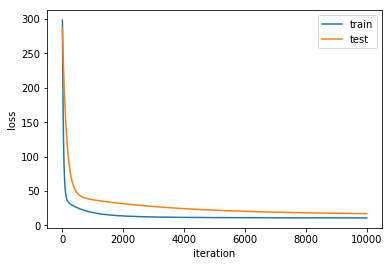

In [ ]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot
train,target=load_svmlight_file('C:/Users/chen/Desktop/housing.txt')#读取数据
x_train,x_test, y_train,y_test = train_test_split(train,
target,
test_size = 0.2,
random_state = 0)#切分数据集
def loss_fn(x, y, theta):
    m = len(y)
    return np.sum((x.dot(theta) - y) ** 2) / (2 * m)
#批量梯度下降函数
def GradientDescent(x, y, theta, alpha, m, maxIterations):
    xTrains = x.transpose()#取x的转置矩阵
    loss_iteration = [0] * maxIterations#迭代loss
    for i in range(0, maxIterations):
     hypothesis = x.dot(theta)
     loss =hypothesis - y
     gradient = xTrains.dot(loss)/m
     loss = loss_fn(x, y, theta)
     loss_iteration[i] = loss
     theta = theta - alpha * gradient
    return theta,loss_iteration
m, n = np.shape(x_train)
theta= np.zeros((n,1))#参数模型初始化
alpha = 0.005#设定学习率
maxIteration = 10000#设定迭代次数
y_train=y_train.reshape(m,1)
m, n = np.shape(x_test)
y_test=y_test.reshape(m,1)
theta_train,loss_iteration_train = GradientDescent(x_train,y_train, theta, alpha, m, maxIteration)
theta_test,loss_iteration_test = GradientDescent(x_test,y_test, theta, alpha, m, maxIteration)
pyplot.plot(loss_iteration_train, mfc='w',label='train')
pyplot.plot(loss_iteration_test, mfc='w',label='test')
pyplot.legend()
pyplot.xlabel("iteration")
pyplot.ylabel("loss")
pyplot.show()